In [64]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from datetime import datetime, date 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.inspection import permutation_importance


#Logistic regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc,precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold
from sklearn.pipeline import make_pipeline

import sklearn
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble 
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.pipeline import make_pipeline

import statsmodels.api as sm

In [148]:
df = pd.read_csv('cso_only.csv')

In [149]:
df = df.drop(['Date','Time'], axis=1)

In [150]:
df

,cso15,cso18,CSOspills,Riverflow
0,0.00000,1.38450,1.38450,1.928959
1,0.00000,0.30000,0.30000,1.349560
2,2.78340,6.73200,9.51540,2.941324
3,21.69450,7.99140,29.68590,2.939100
4,207.95565,123.87630,331.83195,1.499941
...,...,...,...,...
1654,0.00000,4.27050,4.27050,11.650569
1655,72.95880,48.72990,121.68870,5.980247
1656,90.98340,84.95850,175.94190,5.972978
1657,19.24155,7.83195,27.07350,3.505286


In [151]:
y = df['Riverflow']
X = df.drop(['Riverflow'],axis=1)

<AxesSubplot:xlabel='CSOspills', ylabel='Riverflow'>

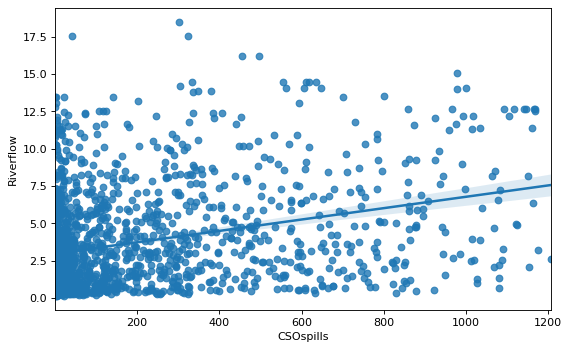

In [125]:
sns.regplot(x='CSOspills', y='Riverflow',data=df)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20,random_state = 5)

## Polynomial Linear regression based on total CSOspills

In [157]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = PolynomialFeatures(degree = 5).fit_transform(np.c_[df.CSOspills])
l = LinearRegression(fit_intercept = False).fit(X,df.Riverflow)
print(l.coef_)

[ 2.75832349e+00  6.67445620e-03  1.66776961e-05 -8.17489865e-08
  9.71684503e-11 -3.49399329e-14]


In [158]:
#X_test_trans = PolynomialFeatures(degree = 12).fit_transform(np.c_[X_test])

In [159]:
df["pred_rf_comb"] = l.predict(X)

In [160]:
df["pred_rf_comb"]

0       2.767596
1       2.760327
2       2.823274
3       2.969094
4       4.860098
          ...   
1654    2.787125
1655    3.690560
1656    4.090892
1657    2.949678
1658    2.842234
Name: pred_rf_comb, Length: 1659, dtype: float64

In [161]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.array(y), np.array(df['pred_rf_comb']))

9.958163951722074

In [162]:
def poly_reg_mse(df, x = 'x', y = 'y', degree=1, plot_data = True, plot_fit =True):
    X = np.c_[df['CSOspills']]
    Y = df['Riverflow']
    p = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression(fit_intercept=False)
        )
    m = p.fit(X,Y)
    pred_col = 'pred_d'+str(degree)
    df[pred_col] = m.predict(X)
    mse = mean_squared_error(Y, df[pred_col])
    if plot_data:
        sns.scatterplot(df[x],df[y], color="black")
    if plot_fit:
        sns.lineplot(df[x],data[pred_col])
    return (df, m.steps[1][1],mse)


In [163]:
from sklearn.pipeline import make_pipeline

poly_res = pd.DataFrame({"degree": range(1,21), "mse": range(1,21)})
for i in range(1,21):
    _, _, mse_d = poly_reg_mse(df, degree = i, plot_data=False, plot_fit=False)
    poly_res.iloc[i - 1, 1] = mse_d

poly_res

,degree,mse
0,1,10.074313
1,2,10.045188
2,3,9.964918
3,4,9.964286
4,5,9.958164
5,6,14.385824
6,7,15.512829
7,8,16.490677
8,9,17.513269
9,10,18.480059


<AxesSubplot:xlabel='degree', ylabel='mse'>

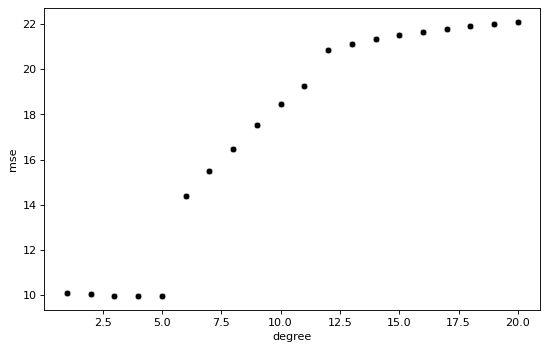

In [164]:
sns.scatterplot(x='degree', y='mse', data=poly_res, color="black")

### $$\boldsymbol{y} = c + \boldsymbol{\alpha}_1\boldsymbol{x} + \boldsymbol{\alpha}_2\boldsymbol{x}^2 + \boldsymbol{\alpha}_3\boldsymbol{x}^3 + \boldsymbol{\alpha}_4\boldsymbol{x}^4 + \boldsymbol{\alpha}_5\boldsymbol{x}^5 $$

### $$\boldsymbol{y} : Riverflow$$

### $$\boldsymbol{x} : total-CSOspills$$

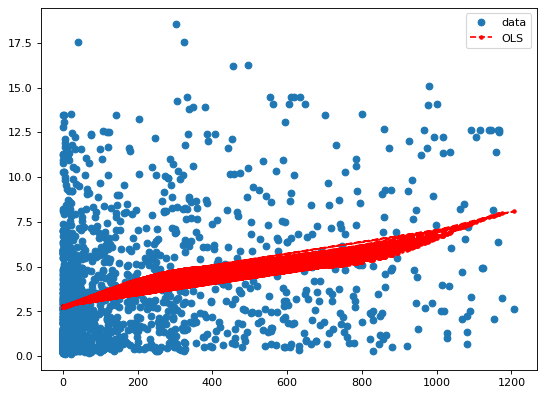

In [165]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df['CSOspills'], y, 'o', label='data')
ax.plot(df['CSOspills'], df["pred_rf_comb"], 'r--.',label='OLS')
#ax.axis((-0.05, 2, 0, 25))

## Multi-Varible Linear regression

### With total CSO spills

In [109]:
model_1 = sm.OLS(y, X)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Riverflow   R-squared (uncentered):                   0.395
Model:                            OLS   Adj. R-squared (uncentered):              0.394
Method:                 Least Squares   F-statistic:                              541.4
Date:                Sat, 26 Jun 2021   Prob (F-statistic):                   1.13e-181
Time:                        23:56:32   Log-Likelihood:                         -4604.1
No. Observations:                1659   AIC:                                      9212.
Df Residuals:                    1657   BIC:                                      9223.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cso15         -0.0219      0.002     -8.783      0.000      -0.027      -0.017
cso18          0.0319      0.003     11.010      0.000       0.026       0.038
CSOspills      0.0100      0.000     22.366      0.000       0.009       0.011
==============================================================================
Omnibus:                       73.510   Durbin-Watson:                   0.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.976
Skew:                           0.259   Prob(JB):                     9.09e-37
Kurtosis:                       4.460   Cond. No.                     7.36e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.23e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Without total CSO spills

In [134]:
X = X.drop(['CSOspills'],axis=1)

In [135]:
model_2 = sm.OLS(y, X)
result = model_2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Riverflow   R-squared (uncentered):                   0.395
Model:                            OLS   Adj. R-squared (uncentered):              0.394
Method:                 Least Squares   F-statistic:                              541.4
Date:                Sun, 27 Jun 2021   Prob (F-statistic):                   1.13e-181
Time:                        01:18:40   Log-Likelihood:                         -4604.1
No. Observations:                1659   AIC:                                      9212.
Df Residuals:                    1657   BIC:                                      9223.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cso15         -0.0119      0.002     -5.646      0.000      -0.016      -0.008
cso18          0.0419      0.003     12.649      0.000       0.035       0.048
==============================================================================
Omnibus:                       73.510   Durbin-Watson:                   0.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.976
Skew:                           0.259   Prob(JB):                     9.09e-37
Kurtosis:                       4.460   Cond. No.                         9.93
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
y_fitted = result.fittedvalues

In [146]:
mean_squared_error(np.array(y), np.array(y_fitted))

15.0678529042657

### Fitting VS data

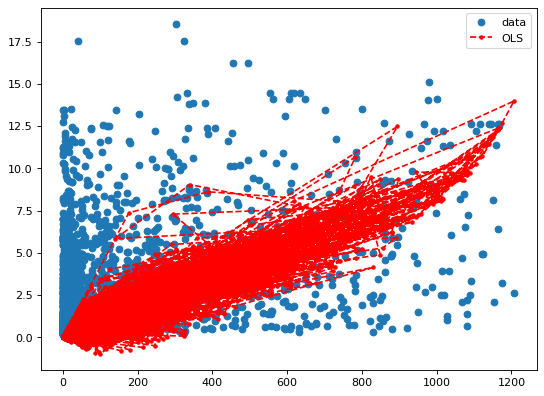

In [145]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df['CSOspills'], y, 'o', label='data')
ax.plot(df['CSOspills'], y_fitted, 'r--.',label='OLS')

### Set x range [0.2]

(0.0, 2.0, 0.0, 25.0)

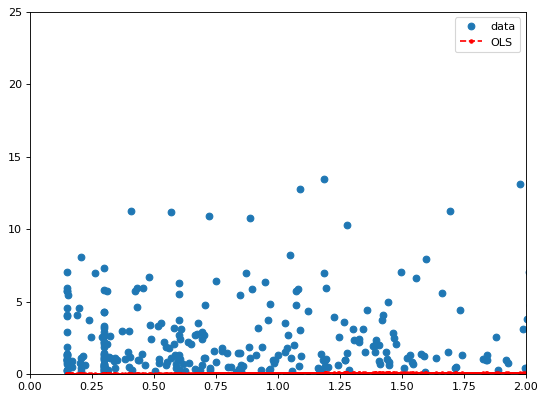

In [144]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df['CSOspills'], y, 'o', label='data')
ax.plot(df['CSOspills'], y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')
ax.axis((-0.05, 2, 0, 25))

In [112]:
model_3 = sm.OLS(y, df['CSOspills'])
result = model_3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Riverflow   R-squared (uncentered):                   0.359
Model:                            OLS   Adj. R-squared (uncentered):              0.358
Method:                 Least Squares   F-statistic:                              927.9
Date:                Sat, 26 Jun 2021   Prob (F-statistic):                   3.17e-162
Time:                        23:56:41   Log-Likelihood:                         -4652.6
No. Observations:                1659   AIC:                                      9307.
Df Residuals:                    1658   BIC:                                      9313.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CSOspills      0.0089      0.000     30.461      0.000       0.008       0.010
==============================================================================
Omnibus:                      104.712   Durbin-Watson:                   0.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.639
Skew:                           0.468   Prob(JB):                     2.19e-40
Kurtosis:                       4.328   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
from sklearn import linear_model
lm=linear_model.LinearRegression()

In [122]:
model = lm.fit(X,y)
print(model.intercept_, model.coef_)

2.8791406429055435 [-0.01668603  0.02226202  0.00557599]


In [127]:
scores = - cross_val_score(lm, X, y, cv=5, scoring='neg_mean_squared_error')
print(np.mean(scores))

10.310612413373708


### K-Fold Cross Validation Method

In [128]:
from sklearn import neighbors

In [131]:
features=['cso15','cso18']
X = df[features] 
y = df['Riverflow']

knn = neighbors.KNeighborsRegressor(5, weights='uniform')
knn.fit(X,y)
scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error') 
print(np.mean(scores))

12.190315463609801


### Decision Tree

In [132]:
from sklearn import tree

dt = tree.DecisionTreeRegressor()
dt.fit(X,y)
scores = -cross_val_score(dt, X, y, cv=5, scoring='neg_mean_squared_error') 
print(np.mean(scores))

20.361128241468833
